# Машинное обучение. Практическое задание №1

Выполнил: Колованов Родион Алексеевич, группа 9381.

## Задание 1

Предположим $X$ и $Y$ две случайные переменные отражающие возраст и вес, соответственно. Рассмотрим случайную выборку из 20 наблюдений:

$ X = (69, 74, 68, 70, 72, 67, 66, 70, 76, 68, 72, 79, 74, 67, 66, 71, 74, 75, 75, 76) $

$ Y = (153, 175, 155, 135, 172, 150, 115, 137, 200, 130, 140, 265, 185, 112, 140,  150, 165, 185, 210, 220) $

Необходимо:

1. Найти среднее, медиану и моду величины $X$;
2. Найти дисперсию $Y$;
3. Построить график нормального распределения для $X$;
4. Найти вероятность того, что возраст больше 80;
5. Найти двумерное мат. ожидания и ковариационную матрицу для этих двух величин;
6. Определить корреляцию между $X$ и $Y$;
7. Построить диаграмму рассеяния, отображающая зависимость между возрастом и весом.

### Решение

Подключим необходимые библиотеки:

In [115]:
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate

Начальные данные:

In [116]:
X = [69, 74, 68, 70, 72, 67, 66, 70, 76, 68, 72, 79, 74, 67, 66, 71, 74, 75, 75, 76]
Y = [153, 175, 155, 135, 172, 150, 115, 137, 200, 130, 140, 265, 185, 112, 140, 150, 165, 185, 210, 220]
sorted_X = sorted(X)
sorted_Y = sorted(Y)

#### 1. Найти среднее, медиану и моду величины $X$.

$$ \hat{\mu} = \frac{1}{n} \sum_{i=1}^{n} x_i $$

Найдем среднее величины $X$:

In [117]:
def mean(data):
    return sum(data) / len(data)

X_mean = mean(X)

print("Среднее: {}".format(X_mean))

Среднее: 71.45


$$ \hat{F}(m) = 0.5, где\: m - медиана $$

Для этого в вариационном ряду для $X$ возьмем центральный элемент. Если количество элементов четно, то берем среднее значение между двями элементами по середине.

Найдем медиану величины $X$:

In [118]:
X_median = (sorted_X[len_X // 2] + sorted_X[len_X // 2 - 1]) / 2 if (len_X % 2 == 0) else sorted_X[len_X // 2]

print("Медиана: {}".format(X_median))

Медиана: 71.5


$$ mode(X) = argmax_x(\hat{f}(x)) $$

Найдем моду величины $X$:

In [119]:
X_mode = max([(x, X.count(x)) for x in set(X)], key=lambda x: x[1])[0]

print("Мода: {}".format(X_mode))

Мода: 74


#### 2. Найти дисперсию $Y$:

$$ \hat{\sigma}^2 = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{\mu})^2 $$

Найдем дисперсию величины $Y$:

In [120]:
def variance(data):
    m = mean(data)
    return sum([(v - m) ** 2 for v in data]) / len(data)

Y_variance = variance(Y)

print("Дисперсия: {}".format(round(Y_variance, 5)))

Дисперсия: 1369.21


#### 3. Построить график нормального распределения для $X$:

In [121]:
# Плотность нормального распределения
def norm_pdf(x, mu, sigma):
    return (math.e ** (-0.5 * ((x - mu) ** 2) / (sigma ** 2))) / (sigma * math.sqrt(2 * math.pi))

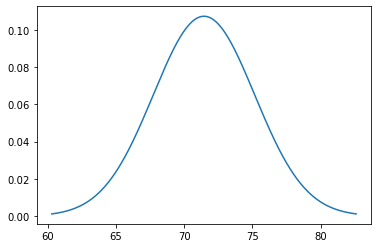

In [122]:
X_variance = variance(X)
X_deviation = math.sqrt(X_variance)

x_values = np.linspace(X_mean - 3 * X_deviation, X_mean + 3 * X_deviation, 1000)
y_values = [norm_pdf(x, X_mean, X_deviation) for x in x_values]

plt.plot(x_values, y_values)
plt.show()

#### 4. Найти вероятность того, что возраст больше 80:

Для этого можно взять интеграл по плотности вероятности:

In [123]:
# Плотность нормального распределения величины X
def x_norm_pdf(x):
    return norm_pdf(x, X_mean, X_deviation)

# Берем интеграл по плотности от 80 до +inf
p = integrate.quad(x_norm_pdf, 80, np.inf)[0]

print("Вероятность:", round(p, 5))

Вероятность: 0.01079


#### 5. Найти двумерное мат. ожидания и ковариационную матрицу для $X$ и $Y$:

Найдем двумерное мат. ожидания для $X$ и $Y$:

In [124]:
Y_mean = mean(Y)

print("Вектор мат. ожиданий:\n", np.array([[X_mean], [Y_mean]]))

Вектор мат. ожиданий:
 [[ 71.45]
 [164.7 ]]


$$ \hat{\sigma}_{12} = \frac{1}{n} \sum_{i=1}^{n} (x_{i1} - \hat{\mu}_1)(x_{i2} - \hat{\mu}_2) $$

Найдем матрицу ковариации для $X$ и $Y$:

In [125]:
def covariance(data1, data2):
    assert(len(data1) == len(data2))
    l = len(data1)
    data1_mean = mean(data1)
    data2_mean = mean(data2)
    return sum([(data1[i] - data1_mean) * (data2[i] - data2_mean) for i in range(l)]) / l

cov = np.array([[covariance(X, X), covariance(X, Y)],
                [covariance(Y, X), covariance(Y, Y)]])

print("Ковариационная матрица:\n", cov)

Ковариационная матрица:
 [[  13.8475  122.435 ]
 [ 122.435  1369.21  ]]


#### 6. Определить корреляцию между $X$ и $Y$:

$$ \hat{\rho} = \frac{\hat{\sigma}_{12}}{\sqrt{\hat{\sigma}_1^2 \hat{\sigma}_2^2}} $$

Найдем коэффициент корреляции между $X$ и $Y$:

In [126]:
corr = covariance(X, Y) / math.sqrt(X_variance * Y_variance)

print("Коэффициент корреляции:", round(corr, 5))

Коэффициент корреляции: 0.88917


#### 7. Построить диаграмму рассеяния, отображающая зависимость между возрастом и весом:

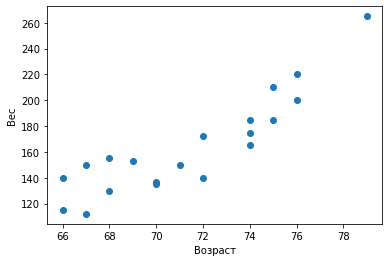

In [127]:
plt.xlabel("Возраст")
plt.ylabel("Вес")
plt.scatter(X, Y)
plt.show()

## Задание 2

Для следующего набора данных

|   | X_1 | X_2 | X_3 |
|:--|:---:|:---:|:---:|
| a | 17  | 17  | 12  |
| b | 11  | 9   | 13  |
| c | 11  | 8   | 19  |

Рассчитайте ковариационную матрицу и обобщенную дисперсию.

### Решение

Начальные данные:

In [128]:
X_1 = [17, 11, 11]
X_2 = [17, 9, 8]
X_3 = [12, 13, 19]

Найдем ковариационную матрицу для $X_1$, $X_2$ и $X_3$:

In [140]:
cov = np.array([[covariance(X_1, X_1), covariance(X_1, X_2), covariance(X_1, X_3)],
                [covariance(X_2, X_1), covariance(X_2, X_2), covariance(X_2, X_3)],
                [covariance(X_3, X_1), covariance(X_3, X_2), covariance(X_3, X_3)]])

import statistics
print(mean(X_1))
print(variance(X_1))
print(np.cov(X_1, X_2))

print("Ковариационная матрица:\n", np.round(cov, 5))

13.0
8.0
[[12.         17.        ]
 [17.         24.33333333]]
Ковариационная матрица:
 [[ 8.      11.33333 -5.33333]
 [11.33333 16.22222 -8.55556]
 [-5.33333 -8.55556  9.55556]]


Найдем обобщенную дисперсию:

In [130]:
print("Обобщенная дисперсия:", round(np.linalg.det(cov), 5))

Обобщенная дисперсия: -0.0


## Задание 3

Даны два одномерных нормальных распределения $N_a$ и $N_b$ с мат. ожиданиями 4, 8 и СКО 1, 2 соответственно.

1. Для каждого из значения $\{5, 6, 7\}$ определите какое из распределений сгенерировало значение с большей вероятностью;
2. Найди значение, которой могло быть сгенерировано обеими распределениями с равной вероятностью.

### Решение

Начальные данные:

In [131]:
a_mean = 4
b_mean = 8
a_deviation = 1
b_deviation = 2

def norm_a_pdf(x):
    return norm_pdf(x, a_mean, a_deviation)

def norm_b_pdf(x):
    return norm_pdf(x, b_mean, b_deviation)

#### 1. Для каждого из значения $\{5, 6, 7\}$ определим, какое из распределений сгенерировало выбранное значение с большей вероятностью:

Сравним значения в точках $\{5, 6, 7\}$ по плотности вероятности для $N_a$ и $N_b$:

In [132]:
values = [5, 6, 7]

for v in values:
    n = "Na" if norm_a_pdf(v) >= norm_b_pdf(v) else "Nb"
    print("Распределение {} генерирует значение {} с большей вероятностью.".format(n, v))

Распределение Na генерирует значение 5 с большей вероятностью.
Распределение Nb генерирует значение 6 с большей вероятностью.
Распределение Nb генерирует значение 7 с большей вероятностью.


Для наглядности посторим графики плотности вероятности для $N_a$ и $N_b$:

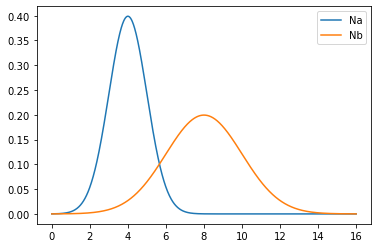

In [133]:
x_values = np.linspace(0, 16, 1000)
y_values = [norm_a_pdf(x) for x in x_values]

plt.plot(x_values, y_values, label="Na")

x_values = np.linspace(0, 16, 1000)
y_values = [norm_b_pdf(x) for x in x_values]

plt.plot(x_values, y_values, label="Nb")

plt.legend()
plt.show()

#### 2. Найдем значение, которой могло быть сгенерировано обеими распределениями с равной вероятностью:

Видно, что графики плотностей пересекаются где-то в интервале от 5 до 6.

In [134]:
x_values = np.linspace(5, 6, 1000000)

for x in x_values:
    if abs(norm_a_pdf(x) - norm_b_pdf(x)) < 0.000001:
        print("Значение {} генерируется обоими распределениями с равной вероятностью (с точностью 0.000001).".format(round(x, 6)))
        break

Значение 5.659906 генерируется обоими распределениями с равной вероятностью (с точностью 0.000001).
